# Gradient Descent 

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

## Creating synthetic datasets for testing

In [2]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 100, n_features=5,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)

## Linear Regression

### Mean Square Cost Function for linear regression

### Specify loc='in' while using cost function inside Gradient Descent(gd function) 

In [3]:
def cost(x, y, th, loc=None):
    m = len(x)
    if loc != 'in':
        x = np.hstack((np.array([1]*m).reshape(-1,1), x))
    y = y.reshape(-1,1)
    return (np.sum((x.dot(th) - y)**2)) / (2*m)

### Intercept and Coefficient calculating Function for linear regression using Gradient Descent

x     -> the training dataset, a 2D array.

y     -> target values, 1D array.

a     -> learning rate.

itr   -> maximum number of iterations to be performed.

graph -> To check if the model has coverged or not.
         Set 1, to see the plot.
         Set 0, to get the intercept and coefficients alone, without the plot.

In [4]:
def gd(x, y, a=0.1, itr=100, graph=0):
    m, n = x.shape 
    # m -> no of datapoints
    # n -> no of features
    
    th = np.array([0]*(n+1)).reshape(-1,1)
    # th -> set intercept and coefficient values to 0 initially
    
    x = np.hstack((np.ones((m,1)), x))
    # add a row of 1s to the dataset to mulitply with the intercept term in th
    
    y = y.reshape(-1,1)
    cst = [cost(x, y, th, loc='in')]
    # list to store the cost to check for convergence
    
    for i in range(itr):
        der = (x.T).dot(x.dot(th) - y) / m
        # gradient of the cost function
        
        th = th - (a * der) #updated th
        cst.append(cost(x, y, th, loc='in')) #cost for updated th
    if graph == 1:
        plt.figure()
        plt.plot(cst) #plot the cost wrt iterations
        plt.title('Convergence curve for alpha = {} and max_iteration = {}'.format(a, itr))
        plt.ylabel('Mean square error (Cost function)')
        plt.xlabel('Iteration')
    return th

### A diverging model for high learning rate(a)

<IPython.core.display.Javascript object>


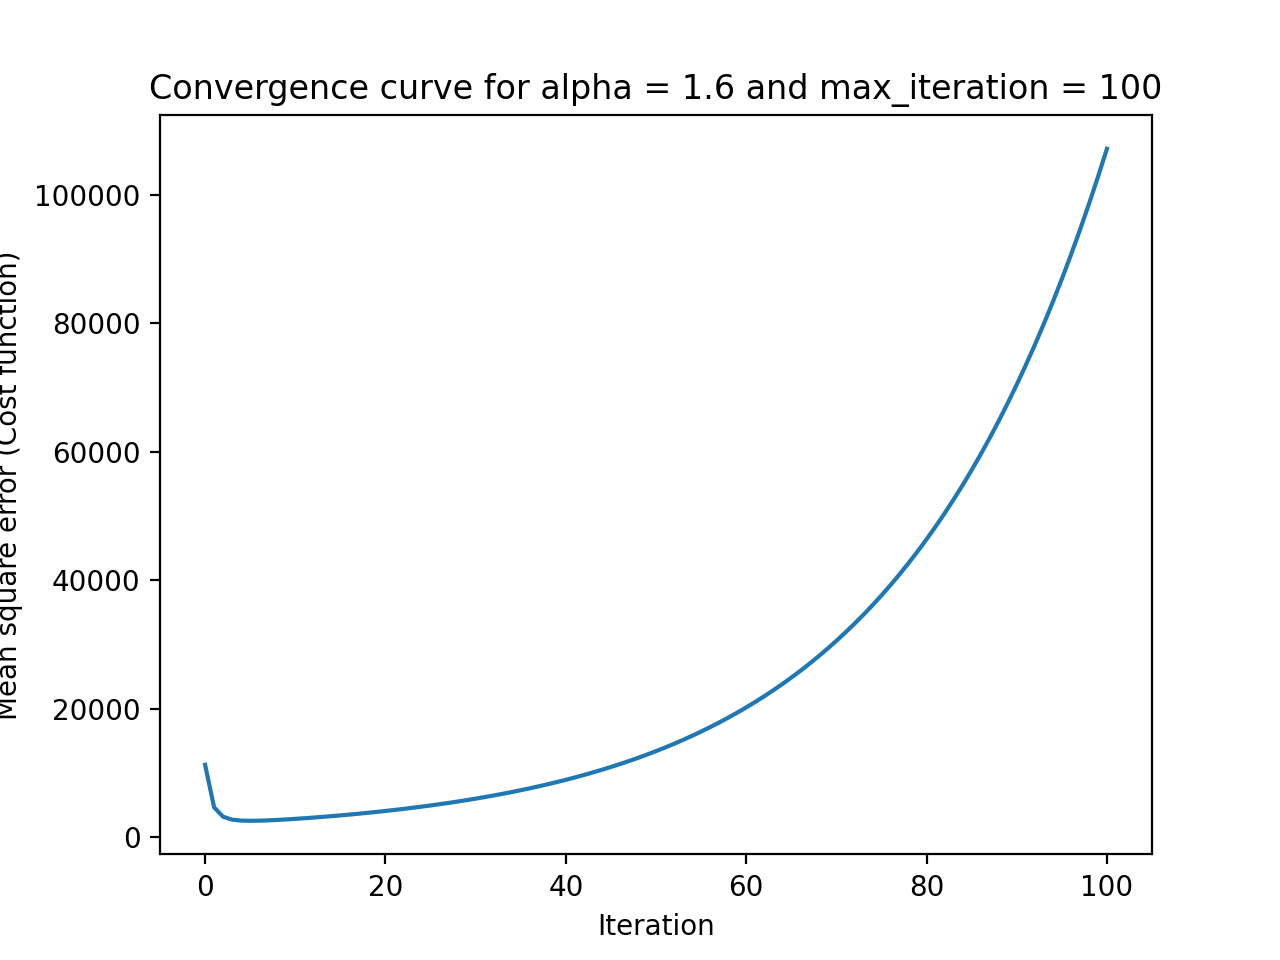

In [5]:
out = gd(X, y, a=1.6, itr=100, graph=1)

In [6]:
print('Intercept: ', out[0,0])
print('Coefficients: ', out[1:].ravel()) # bad parameters estimated

Intercept:  -80.8595376369127
Coefficients:  [ 294.88861129   65.88287063  -87.03584933 -209.46334599  -38.27524816]


### A perfectly converging model for appropriate learning rate(a)

<IPython.core.display.Javascript object>


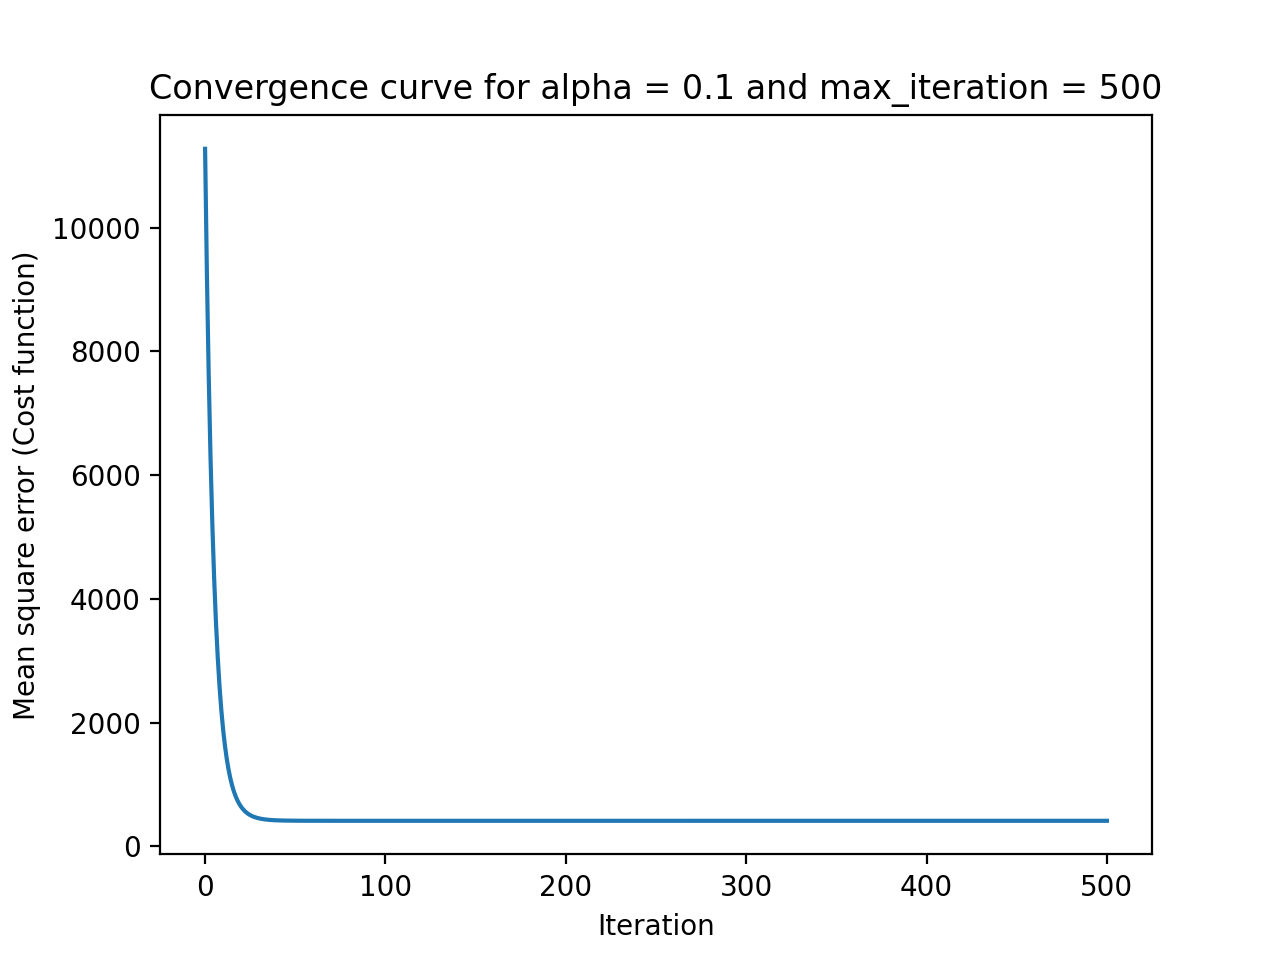

In [7]:
out = gd(X, y, a=0.1, itr=500, graph=1)

In [8]:
print('Intercept: ', out[0,0])
print('Coefficients: ', out[1:].ravel()) # proper parameters estimated

Intercept:  143.77847323916086
Coefficients:  [ 4.61227983e+01 -2.53661603e-02 -7.15237911e+00  1.77414863e+00
 -2.05884295e+00]


### Verifying Results with Scikit-learn

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X, y)
print('Intercept: ', lr.intercept_)
print('Coefficients: ', lr.coef_)

Intercept:  143.77847323916103
Coefficients:  [ 4.61227983e+01 -2.53661603e-02 -7.15237911e+00  1.77414863e+00
 -2.05884295e+00]
